In [ ]:

from collections import defaultdict
from dimod import SimulatedAnnealingSampler
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivatives
def f(x):
    return 1 / (1 + np.exp(20 * x))

def f_prime_norm(x):
    return (-20 * np.exp(20 * x) / (1+2*np.exp(20*x)+np.pow(np.exp(20*x),2)))/5


# def f_second(x):
#     return -4 * (np.pi**2) * np.sin(2 * np.pi * x) -64 * (np.pi**2) *np.cos(8*np.pi*x)

# def f_second_norm(x):
#     res = f_second(x)
#     return res/np.max(abs(res))

# Initial uniform mesh
x_initial = np.linspace(-1, 1, 20)
x_tot = np.linspace(-1, 1, 50)
y_initial = f(x_initial)
# x_mid = np.zeros(9)
# for i in range(9):
#     x_mid[i] = (x_initial[i]+x_initial[i+1])/2


# Initialize our Q matrix
Q = defaultdict(int)

F=20
beta = 1
#Define the Q matrix
for i in range(50):
    Q[(i,i)] = -40*abs(f_prime_norm(x_tot[i])**2)+beta*(1-2*F)
    # if i == 0 or i == 49:
    #     Q[(i,i)] = Q[(i,i)]-40
    for j in range(50):
        if i != j and i<j :
            Q[(i,j)] = 2*beta

print(Q)


defaultdict(<class 'int'>, {(0, 0): np.float64(-79.0), (0, 1): 2, (0, 2): 2, (0, 3): 2, (0, 4): 2, (0, 5): 2, (0, 6): 2, (0, 7): 2, (0, 8): 2, (0, 9): 2, (0, 10): 2, (0, 11): 2, (0, 12): 2, (0, 13): 2, (0, 14): 2, (0, 15): 2, (0, 16): 2, (0, 17): 2, (0, 18): 2, (0, 19): 2, (0, 20): 2, (0, 21): 2, (0, 22): 2, (0, 23): 2, (0, 24): 2, (0, 25): 2, (0, 26): 2, (0, 27): 2, (0, 28): 2, (0, 29): 2, (0, 30): 2, (0, 31): 2, (0, 32): 2, (0, 33): 2, (0, 34): 2, (0, 35): 2, (0, 36): 2, (0, 37): 2, (0, 38): 2, (0, 39): 2, (0, 40): 2, (0, 41): 2, (0, 42): 2, (0, 43): 2, (0, 44): 2, (0, 45): 2, (0, 46): 2, (0, 47): 2, (0, 48): 2, (0, 49): 2, (1, 1): np.float64(-39.000000000000014), (1, 2): 2, (1, 3): 2, (1, 4): 2, (1, 5): 2, (1, 6): 2, (1, 7): 2, (1, 8): 2, (1, 9): 2, (1, 10): 2, (1, 11): 2, (1, 12): 2, (1, 13): 2, (1, 14): 2, (1, 15): 2, (1, 16): 2, (1, 17): 2, (1, 18): 2, (1, 19): 2, (1, 20): 2, (1, 21): 2, (1, 22): 2, (1, 23): 2, (1, 24): 2, (1, 25): 2, (1, 26): 2, (1, 27): 2, (1, 28): 2, (1, 29): 

In [16]:

# Define the sampler that will be used to run the problem
#sampler = EmbeddingComposite(DWaveSampler())
# Instantiate the sampler
sampler = SimulatedAnnealingSampler()

# Run the problem on the sampler and print the results
sampleset = sampler.sample_qubo(Q,
                                 num_reads = 100,
                                 label='Example - Simple Ocean Programs: QUBO')
#print(sampleset) #prints energy, number of occurencies and 
result = sampleset.first.sample

#print(first)
#for k in range(9):
    #print(result[k])

x_adapt = [x_tot[k] for k in range(len(x_tot)) if result[k] == 1]

print(x_initial)
print(x_adapt)


[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
[np.float64(-1.0), np.float64(-0.6326530612244898), np.float64(-0.5510204081632654), np.float64(-0.3877551020408164), np.float64(-0.34693877551020413), np.float64(-0.22448979591836737), np.float64(-0.1836734693877552), np.float64(-0.1428571428571429), np.float64(-0.10204081632653073), np.float64(-0.061224489795918435), np.float64(-0.020408163265306145), np.float64(0.020408163265306145), np.float64(0.06122448979591821), np.float64(0.1020408163265305), np.float64(0.1428571428571428), np.float64(0.18367346938775508), np.float64(0.22448979591836715), np.float64(0.6326530612244896), np.float64(0.7142857142857142), np.float64(1.0)]


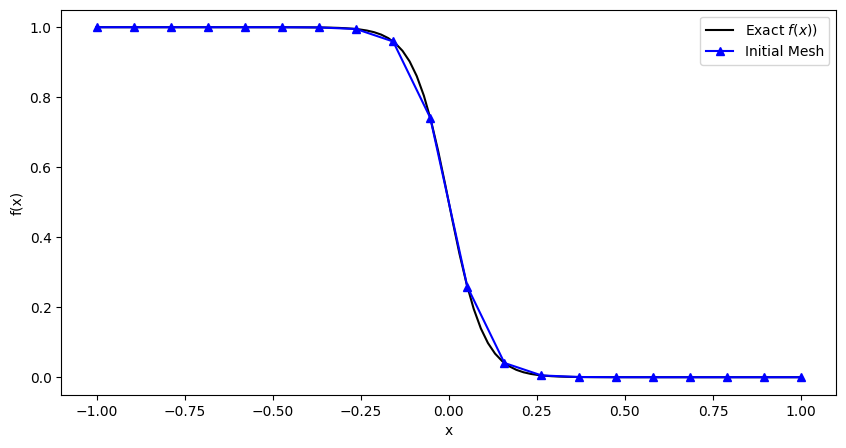

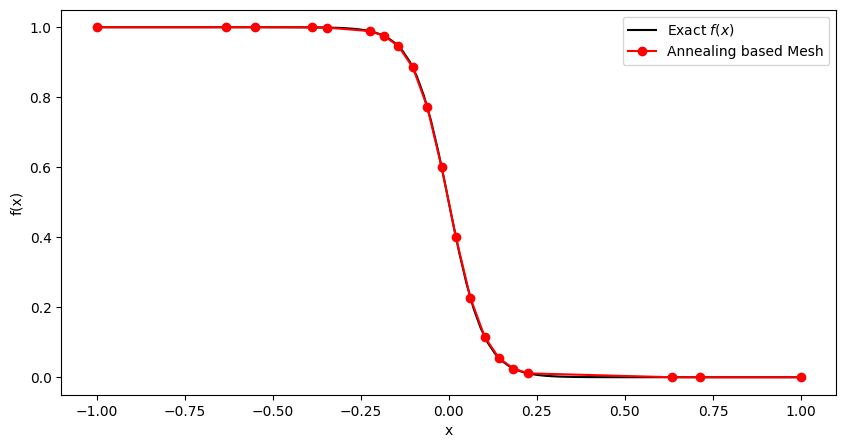

In [17]:

y_adaptive = f(np.array(x_adapt))
# Plotting the initial and adapted meshes
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x))$")
plt.plot(x_initial, y_initial, 'b^-', label="Initial Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(-1, 1, 100), f(np.linspace(-1, 1, 100)), 'k-', label="Exact $f(x)$")
plt.plot(x_adapt, y_adaptive, 'ro-', label="Annealing based Mesh")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

